In [1]:
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

In [2]:
cat4 = cv2.imread('../DATA/CATS_DOGS/train/CAT/4.jpg')

In [3]:
cat4 = cv2.cvtColor(cat4, cv2.COLOR_BGR2RGB)

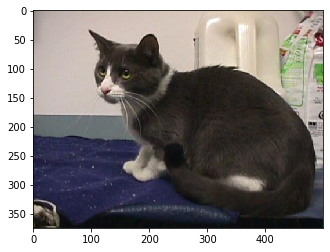

In [4]:
plt.imshow(cat4)

In [5]:
cat4.shape

(375, 500, 3)

In [6]:
dog2 = cv2.imread('../DATA/CATS_DOGS/train/DOG/2.jpg')

In [7]:
dog2 = cv2.cvtColor(dog2, cv2.COLOR_BGR2RGB)

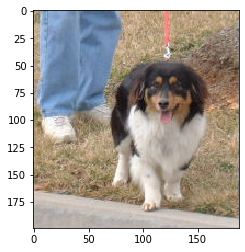

In [8]:
plt.imshow(dog2)

In [9]:
dog2.shape

(199, 188, 3)

# Prepare the data for the model

In [10]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Activation,Dropout,Flatten,MaxPool2D, Conv2D, Dense

In [11]:
image_gen = ImageDataGenerator(rotation_range=30, 
                               width_shift_range=0.1, 
                               height_shift_range=0.1, 
                               rescale=1/255, 
                               shear_range=0.2,
                               zoom_range=0.2,
                               horizontal_flip=True,
                               fill_mode='nearest'
                              )

In [12]:
image_gen.random_transform(dog2)

array([[[161, 178, 199],
        [155, 182, 211],
        [144, 176, 214],
        ...,
        [163, 156, 150],
        [163, 156, 150],
        [163, 156, 150]],

       [[170, 186, 208],
        [160, 186, 216],
        [152, 183, 221],
        ...,
        [159, 152, 146],
        [159, 152, 146],
        [158, 151, 145]],

       [[176, 192, 216],
        [164, 189, 219],
        [155, 186, 220],
        ...,
        [149, 142, 136],
        [148, 141, 135],
        [148, 141, 135]],

       ...,

       [[182, 175, 169],
        [179, 172, 166],
        [176, 169, 163],
        ...,
        [210, 203, 200],
        [210, 203, 200],
        [210, 203, 200]],

       [[180, 173, 167],
        [176, 169, 163],
        [174, 167, 161],
        ...,
        [213, 205, 202],
        [213, 205, 202],
        [213, 205, 202]],

       [[181, 174, 168],
        [177, 170, 164],
        [174, 167, 161],
        ...,
        [214, 208, 204],
        [214, 208, 204],
        [215, 208, 205]]

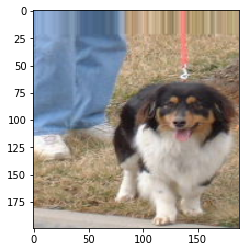

In [13]:
plt.imshow(image_gen.random_transform(dog2))

In [14]:
image_gen.flow_from_directory('../DATA/CATS_DOGS/train')

Found 18743 images belonging to 2 classes.


# Model

In [15]:
model = Sequential()

# Conv Layers 1
model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(150,150, 3), activation='relu'))

model.add(MaxPool2D(pool_size=(2,2)))

# Conv Layers 2
model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(150,150, 3), activation='relu'))

model.add(MaxPool2D(pool_size=(2,2)))

# Conv Layers 3
model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(150,150, 3), activation='relu'))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128 , activation='relu'))

# Dropout layers: it helps reduce overfitting by randomly turning off neurons during training
model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid')) # Opt 2 for activation function inside Dense.

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9248)              0

In [17]:
batch_size = 16 

train_image_gen = image_gen.flow_from_directory('../DATA/CATS_DOGS/train', target_size=(150,150), batch_size=batch_size, class_mode='binary')

Found 18743 images belonging to 2 classes.


In [18]:
test_image_gen = image_gen.flow_from_directory('../DATA/CATS_DOGS/test', target_size=(150,150), batch_size=batch_size, class_mode='binary')

Found 6251 images belonging to 2 classes.


# Class Indices classification for training data 

In [19]:
train_image_gen.class_indices

{'CAT': 0, 'DOG': 1}

In [75]:
# We directly pass train_image_gen without labels because it already has it as an object
# Note: steps_per_epoch is not going to set epochs to test all image which kinda take too long sometimes
# We pass test_image and directly doing evaluation to our model
results = model.fit(train_image_gen, epochs=10, steps_per_epoch= 150, validation_data=test_image_gen, validation_steps=12)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 150 steps, validate for 12 steps
Epoch 1/10
150/150 [==============================] - 80s 535ms/step - loss: 0.6864 - accuracy: 0.5675 - val_loss: 0.6720 - val_accuracy: 0.6250
Epoch 2/10
150/150 [==============================] - 76s 507ms/step - loss: 0.6863 - accuracy: 0.5758 - val_loss: 0.6856 - val_accuracy: 0.5208
Epoch 3/10
150/150 [==============================] - 78s 523ms/step - loss: 0.6719 - accuracy: 0.6012 - val_loss: 0.6861 - val_accuracy: 0.5938
Epoch 4/10
150/150 [==============================] - 73s 489ms/step - loss: 0.6637 - accuracy: 0.6146 - val_loss: 0.6537 - val_accuracy: 0.5885
Epoch 5/10
150/150 [==============================] - 71s 471ms/step - loss: 0.6588 - accuracy: 0.6175 - val_loss: 0.6544 - val_accuracy: 0.6406
Epoch 6/10
150/150 [==============================] - 61s 404ms/step - loss: 0.6570 - accuracy: 0.6146 - val_loss: 0.6572 - val_accuracy: 0.6458
Epoch 7/10
110/150 [=================

C:\Users\WINDOWS 10\Anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:784: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
C:\Users\WINDOWS 10\Anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:784: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
C:\Users\WINDOWS 10\Anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:784: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
C:\Users\WINDOWS 10\Anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:784: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
C:\Users\WINDOWS 10\Anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:784: UserWarning: Possibly corrupt E

150/150 [==============================] - 62s 410ms/step - loss: 0.6337 - accuracy: 0.6496 - val_loss: 0.6342 - val_accuracy: 0.6302
Epoch 8/10
150/150 [==============================] - 61s 407ms/step - loss: 0.6258 - accuracy: 0.6587 - val_loss: 0.6015 - val_accuracy: 0.6823
Epoch 9/10
150/150 [==============================] - 58s 388ms/step - loss: 0.6301 - accuracy: 0.6521 - val_loss: 0.6406 - val_accuracy: 0.6250
Epoch 10/10
150/150 [==============================] - 54s 360ms/step - loss: 0.6228 - accuracy: 0.6625 - val_loss: 0.6613 - val_accuracy: 0.6094


In [76]:
results.history['accuracy']

[0.5675,
 0.5758333,
 0.60125,
 0.6145833,
 0.6175,
 0.6145833,
 0.64958334,
 0.65875,
 0.65208334,
 0.6625]

# We will get low accuracy since we only runs 1 epochs with 150 steps

In [73]:
###
# model.evaluate(x_test)

NameError: name 'x_test' is not defined

# Now lets test our model with new image

In [23]:
from tensorflow.keras.preprocessing import image

In [77]:
dog_img = image.load_img('../DATA/anjinglu.jpg', target_size=(150,150))

# Convert to Array
dog_img = image.img_to_array(dog_img)

In [78]:
# We need to make it as batch of image so neural network understand image

In [79]:
import numpy as np
dog_img = np.expand_dims(dog_img, axis=0)

In [80]:
dog_img.shape

(1, 150, 150, 3)

In [81]:
# Standardize the value in image to between 0 - 1
dog_img = dog_img / 255

In [82]:
model.predict_classes(dog_img)

array([[1]])

In [83]:
model.predict(dog_img)

array([[0.6787127]], dtype=float32)

# Testing image 2

In [100]:
dog_img2 = image.load_img('../DATA/00-puppy.jpg',  target_size=(150,150))

dog_img2 = image.img_to_array(dog_img2)

dog_img2 = np.expand_dims(dog_img2, axis=0)

In [101]:
dog_img2 = dog_img2 / 255

In [102]:
dog_img2.shape

(1, 150, 150, 3)

In [103]:
model.predict(dog_img2)

array([[0.27510563]], dtype=float32)

In [104]:
model.predict_classes(dog_img2)

array([[0]])

# Save our model

In [105]:
model.save('catdogical1.h5')

In [ ]:
# kalo kita mau load model kita 
# from tensorflow.keras import load_model

# new_model = load_model('catdogical.h5')